In [1]:
# This notebook could not have been done without the help from Adrian of PyImageSearch and Aurelien geron

In [2]:
# import os
# os.getcwd()

In [3]:
# import pandas as pd
# def save_fer_img():
#     fer_data=pd.read_csv('fer2013.csv',delimiter=',')
#     for index,row in fer_data.iterrows():
#         pixels=np.asarray(list(row['pixels'].split(' ')),dtype=np.uint8)
#         classes=np.asarray((row['emotion']),dtype=np.uint8)
#         img=pixels.reshape((48,48))
#         pathname=os.path.join(os.getcwd() + '\\dataset\\'+ str(classes) + "\\" + str(index) + r'.jpg')
#         cv2.imwrite(pathname,img)
#         print('image saved: {}'.format(pathname))

In [4]:
# save_fer_img()

In [5]:
# Everything above needs to be done only once,

In [6]:
# After tons of trying, I learned that some models of transfer learning will not work with small images, i.e., 48 x 48. This is because they
# were trained on 224x224x3, 229x229x3 etc. That is why if I load the weights 'imagenet', they generally won't work well. 

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [8]:
gpus= tf.config.experimental.list_physical_devices('GPU')

In [9]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
tf.config.experimental.set_memory_growth(gpus[0], True)

In [11]:
# First check if GPU is enabled
print(tf.test.is_gpu_available())
print(tf.test.is_built_with_cuda())

True
True


In [12]:
INIT_LR = 1e-4
EPOCHS = 100000
BS = 32

In [13]:
imagePaths = list(paths.list_images("C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset"))
data = []
labels = []

In [14]:
img_to_array(load_img(imagePaths[0])).shape

(48, 48, 3)

In [15]:
print(len(imagePaths))
imagePaths

35887


['C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\0.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\1.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\10.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\10002.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\10016.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\10037.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\10038.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\10052.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\10057.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\EmotionDataset\\Angry\\10063.jpg',
 'C:\\Users\\taij\\Documents\\Calvin\\MyProjects\\datasets\\E

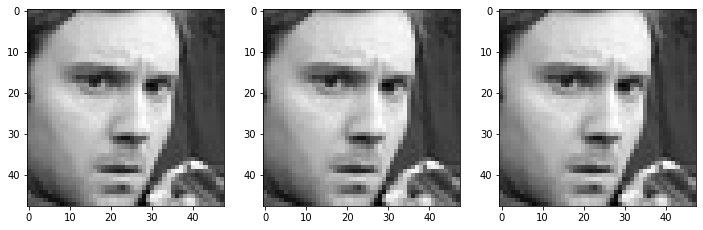

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(img_to_array(load_img(imagePaths[0]))[:,:,0].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(1, 3, 2)
plt.imshow(img_to_array(load_img(imagePaths[0]))[:,:,1].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(1, 3, 3)
plt.imshow(img_to_array(load_img(imagePaths[0]))[:,:,2].reshape(48,48), cmap=plt.cm.gray)
plt.show()

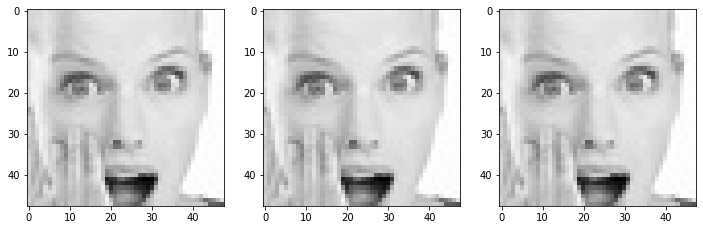

In [17]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(img_to_array(load_img(imagePaths[35886]))[:,:,0].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(1, 3, 2)
plt.imshow(img_to_array(load_img(imagePaths[35886]))[:,:,1].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(1, 3, 3)
plt.imshow(img_to_array(load_img(imagePaths[35886]))[:,:,2].reshape(48,48), cmap=plt.cm.gray)
plt.show()

In [18]:
# As you can see above, the images have three channels but the three channels are the same. Hence, no additional information is
# given to us. Therefore, we will only take one channel and reshape them to (48,48). Note (48,48) is the height and width of the
# images

In [19]:
img_to_array(load_img(imagePaths[2]))[:,:,1].reshape(48,48)

array([[ 29.,  25.,  21., ...,  38.,  45.,  37.],
       [ 31.,  24.,  20., ...,  36.,  36.,  40.],
       [ 28.,  21.,  21., ...,  35.,  32.,  40.],
       ...,
       [ 28.,  29.,  26., ..., 118., 137., 148.],
       [ 30.,  30.,  26., ..., 151., 158., 164.],
       [ 32.,  30.,  27., ..., 174., 173., 174.]], dtype=float32)

In [20]:
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]

    # load the input image (48x48) and preprocess it
    image = load_img(imagePath, target_size=(48,48))
    image = img_to_array(image)
    
    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [21]:
labels

array(['Angry', 'Angry', 'Angry', ..., 'Surprise', 'Surprise', 'Surprise'],
      dtype='<U8')

0
4953
5500
10621
19610
25808
31885


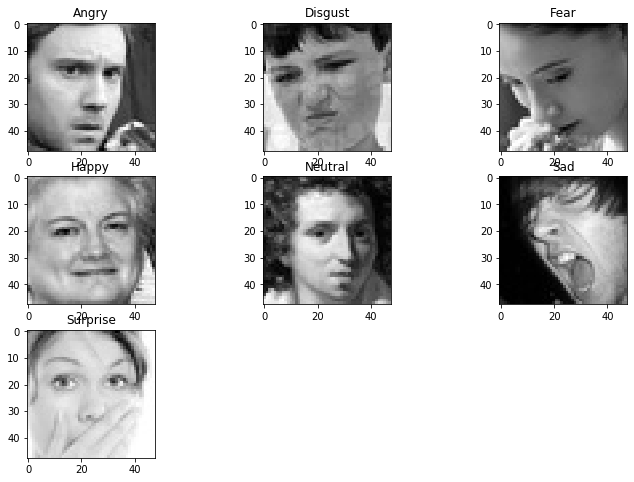

In [22]:
idx0, idx1, idx2, idx3, idx4, idx5, idx6 = 0,0,0,0,0,0,0
for string in labels:
    if string == 'Angry':
        print(idx0)
        break
    idx0 += 1
for string in labels:
    if string == 'Disgust':
        print(idx1)
        break
    idx1 += 1
for string in labels:
    if string == 'Fear':
        print(idx2)
        break
    idx2 += 1
for string in labels:
    if string == 'Happy':
        print(idx3)
        break
    idx3 += 1
for string in labels:
    if string == 'Neutral':
        print(idx4)
        break
    idx4 += 1
for string in labels:
    if string == 'Sad':
        print(idx5)
        break
    idx5 += 1
for string in labels:
    if string == 'Surprise':
        print(idx6)
        break
    idx6 += 1
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1)
plt.title("Angry")
plt.imshow(img_to_array(load_img(imagePaths[idx0]))[:,:,0].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(3, 3, 2)
plt.title("Disgust")
plt.imshow(img_to_array(load_img(imagePaths[idx1]))[:,:,1].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(3, 3, 3)
plt.title("Fear")
plt.imshow(img_to_array(load_img(imagePaths[idx2]))[:,:,2].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(3, 3, 4)
plt.title("Happy")
plt.imshow(img_to_array(load_img(imagePaths[idx3]))[:,:,0].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(3, 3, 5)
plt.title("Neutral")
plt.imshow(img_to_array(load_img(imagePaths[idx4]))[:,:,1].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(3, 3, 6)
plt.title("Sad")
plt.imshow(img_to_array(load_img(imagePaths[idx5]))[:,:,2].reshape(48,48), cmap=plt.cm.gray)
plt.subplot(3, 3, 7)
plt.title("Surprise")
plt.imshow(img_to_array(load_img(imagePaths[idx6]))[:,:,0].reshape(48,48), cmap=plt.cm.gray)
plt.show()

In [23]:
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[['Angry' '4953']
 ['Disgust' '547']
 ['Fear' '5121']
 ['Happy' '8989']
 ['Neutral' '6198']
 ['Sad' '6077']
 ['Surprise' '4002']]


In [24]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
oElabels = ordinal_encoder.fit_transform(labels.reshape(-1, 1))

In [25]:
oElabels

array([[0.],
       [0.],
       [0.],
       ...,
       [6.],
       [6.],
       [6.]])

In [26]:
(trainX, testX, trainY, testY) = train_test_split(data, oElabels, test_size=0.10, stratify=oElabels, shuffle=True,random_state=42)

In [27]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(32298, 48, 48, 3)
(3589, 48, 48, 3)
(32298, 1)
(3589, 1)


In [28]:
trainY = trainY.flatten()
testY = testY.flatten()

In [29]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(32298, 48, 48, 3)
(3589, 48, 48, 3)
(32298,)
(3589,)


In [30]:
# We only need one channel of the three since stacked gray images do not provide extra information
trainX1 = trainX[:,:,:,0][...,np.newaxis]
testX1 = testX[:,:,:,0][...,np.newaxis]

In [31]:
print(trainX1.shape)
print(testX1.shape)
print(trainY.shape)
print(testY.shape)
# Below is the form factor we want for the matrices

(32298, 48, 48, 1)
(3589, 48, 48, 1)
(32298,)
(3589,)


In [32]:
np.unique(trainX1)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [33]:
# Scaling is always a good idea, to help with training
X1_mean = trainX1.mean(axis=0, keepdims=True)
X1_std = trainX1.std(axis=0, keepdims=True) + 1e-7 # avoid division by zero
trainX1 = (trainX1 - X1_mean) / X1_std
testX1 = (testX1 - X1_mean) / X1_std

In [34]:
print(X1_mean.shape)
print(X1_std.shape)

(1, 48, 48, 1)
(1, 48, 48, 1)


In [35]:
np.unique(trainX1) # Looks reasonable (centered at 0 with some std)

array([-3.4335093, -3.4248273, -3.4201741, ...,  2.4446962,  2.4462457,
        2.4491885], dtype=float32)

In [36]:
# To generate more data on the fly
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest")

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=30, # Early stop if there's no more significant improvement on the val_set for 30 epochs
                                                  restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("models/my_CNN_emotion_checkpoint.h5", 
                                                verbose=2, 
                                                save_best_only=True,
                                                save_weights_only=True,
                                                monitor='val_accuracy') # save it to my_CNN_emotion_checkpoint.h5. Why save? in case computer crashes

In [ ]:
# Since we can't use a pre-trained model, we hereby build our own resNet-34 for 48x48x1. Credit goes to Aurelien geron

In [ ]:
from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]
    
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 
                "main_layers": self.main_layers,
                "skip_layers": self.skip_layers,
                 "activation": keras.activations.serialize(self.activation)}

In [ ]:
# Note that the input shape is (48,48,1), architecture picture: https://towardsdatascience.com/understanding-and-visualizing-resnets-442284831be8
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[48, 48, 1]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))  # Note that the number of feature maps is doubled every few residual units, at the same time as their height and width are halved (using a convolutional layer with stride 2)
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(7, activation="softmax")) # there are 7 emotions

In [ ]:
model.summary()

In [ ]:
tf.keras.backend.clear_session() # Destroys the current TF graph and session, and creates a new one

In [ ]:
# If you face GPU memory issue, you need to free up the GPU memory. There are many solutions for LINUX. On windows, you simply have to
# go to device manager, under "Display adapters", disable and enable the GPU card.
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"]) # sparse_categorical_crossentropy because trainY is not one-hot
history = model.fit(aug.flow(trainX1, trainY, batch_size=BS), # fits the model on batches with real-time data augmentation: returns an iterator yielding tuples of (x,y)
                    steps_per_epoch=len(trainX1) // BS, # Number of batches to use for training from the generator in one epoch
                    validation_data=(testX1, testY),
                    validation_steps=len(testX1) // BS, # Number of batches to use for validation in one epoch
                    callbacks=[early_stopping_cb,checkpoint_cb],
                    epochs=EPOCHS)

In [ ]:
score = model.evaluate(testX1, testY)
print(score)
# Got [0.9790992784148042, 0.63806075] for ['loss', 'accuracy']

In [ ]:
model.metrics_names

In [ ]:
predictions = model.predict(testX1, batch_size=BS)
print(predictions.shape)

In [ ]:
predIdxs = np.argmax(predictions, axis=1)
print(predIdxs.shape)
print(predIdxs)
print(testY)

In [ ]:
(unique, counts) = np.unique(predIdxs, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

In [ ]:
(unique, counts) = np.unique(testY, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

In [ ]:
print(classification_report(testY, predIdxs))

In [ ]:
model.save_weights("models/my_custom_CNN_emotion_model_weights")

In [ ]:
# plot the training loss and accuracy
N = len(history.history["loss"])
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.savefig("plots/my_emotion_plot")
# Is it reasonable? Yes, because train_loss keeps decreaing, train_val keeps increasing, whereas val_loss and val_acc seem to have
# plateaued

Below we attempt to load the model

In [ ]:
def create_model(weightsPath):
    # Note that the input shape is 48x48x1
    Rmodel = keras.models.Sequential()
    Rmodel.add(DefaultConv2D(64, kernel_size=7, strides=2,
                            input_shape=[48, 48, 1]))
    Rmodel.add(keras.layers.BatchNormalization())
    Rmodel.add(keras.layers.Activation("relu"))
    Rmodel.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
    prev_filters = 64
    for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
        strides = 1 if filters == prev_filters else 2
        Rmodel.add(ResidualUnit(filters, strides=strides))
        prev_filters = filters
    Rmodel.add(keras.layers.GlobalAvgPool2D())
    Rmodel.add(keras.layers.Flatten())
    Rmodel.add(keras.layers.Dense(7, activation="softmax"))
    Rmodel.load_weights(weightsPath)
    return Rmodel

In [ ]:
restoredModel = create_model("models/my_custom_CNN_emotion_model_weights.h5")

In [ ]:
restoredModel.summary()

In [ ]:
restoredModel.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
score = restoredModel.evaluate(testX1, testY)
score
# Got [0.9790992784148042, 0.63806075] for ['loss', 'accuracy']

In [ ]:
predictions2 = restoredModel.predict(testX1, batch_size=BS)

In [ ]:
predictions2 == predictions

Above is how we can train a custom model. Now, let's try to train a model using transfer learning! The Y's (targets) have to be one-hot encoded to achieve higher accuracy! Not sure why... (Use one-hot Y's and categorical_crossentropy rather then sparse Y's and sparse_categorical_crossentropy)

In [ ]:
# MobileNets support any input size greater than 32 x 32, with larger image sizes offering better performance.
base_model = tf.keras.applications.MobileNetV2(input_shape=(48, 48, 3),
                                               include_top=False,
                                               weights='imagenet')
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(7, activation="softmax")(avg)
modelMobileNetV2 = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
# We need 3 channels for MobileNetV2
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

In [ ]:
trainX2 = np.copy(trainX)
testX2 = np.copy(testX)
trainX2 = tf.keras.applications.mobilenet_v2.preprocess_input(trainX2)
testX2 = tf.keras.applications.mobilenet_v2.preprocess_input(testX2)

In [37]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
trainY1 = np.copy(trainY)
trainY1 = encoder.fit_transform(trainY1.reshape(-1, 1))
testY1 = np.copy(testY)
testY1 = encoder.fit_transform(testY1.reshape(-1, 1))

c:\users\taij\documents\calvin\myprojects\env\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\taij\documents\calvin\myprojects\env\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can s

In [ ]:
# We need 3 channels for MobileNetV2
print(trainX2.shape)
print(testX2.shape)
print(trainY1.shape)
print(testY1.shape)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=15, # Early stop if there's no more significant improvement on the val_set for 30 epochs
                                                  restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("models/my_transfer_CNN_emotion_checkpoint_MobileNetV2.h5", 
                                                verbose=2, 
                                                save_best_only=True,
                                                save_weights_only=True,
                                                monitor='val_accuracy') # save it to my_CNN_emotion_checkpoint.h5. Why save? in case computer crashes

In [ ]:
# Train the last layers
for layer in base_model.layers:
    layer.trainable = False
modelMobileNetV2.compile(loss="categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history1 = modelMobileNetV2.fit(aug.flow(trainX2, trainY1.toarray(), batch_size=BS), # fits the model on batches with real-time data augmentation: returns an iterator yielding tuples of (x,y)
                    steps_per_epoch=len(trainX2) // BS, # Number of batches to use for training from the generator in one epoch
                    validation_data=(testX2, testY1.toarray()),
                    validation_steps=len(testX2) // BS, # Number of batches to use for validation in one epoch
                    callbacks=[early_stopping_cb,checkpoint_cb],
                    epochs=EPOCHS)

In [ ]:
modelMobileNetV2.load_weights("models/my_transfer_CNN_emotion_checkpoint_MobileNetV2.h5")

In [ ]:
for layer in base_model.layers:
    layer.trainable = True
modelMobileNetV2.compile(loss="categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history1 = modelMobileNetV2.fit(aug.flow(trainX2, trainY1.toarray(), batch_size=BS), # fits the model on batches with real-time data augmentation: returns an iterator yielding tuples of (x,y)
                    steps_per_epoch=len(trainX2) // BS, # Number of batches to use for training from the generator in one epoch
                    validation_data=(testX2, testY1.toarray()),
                    validation_steps=len(testX2) // BS, # Number of batches to use for validation in one epoch
                    callbacks=[early_stopping_cb,checkpoint_cb],
                    epochs=EPOCHS)

In [ ]:
score = modelMobileNetV2.evaluate(testX2, testY1.toarray())
print(score)
# Got [1.078829764638913, 0.621343] for ['loss', 'accuracy']

In [ ]:
predictions = modelMobileNetV2.predict(testX2, batch_size=BS)
print(predictions.shape)

In [ ]:
predIdxs = np.argmax(predictions, axis=1)
print(predIdxs.shape)
print(predIdxs)
print(testY)

In [ ]:
(unique, counts) = np.unique(predIdxs, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

In [ ]:
(unique, counts) = np.unique(testY, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

In [ ]:
print(classification_report(testY, predIdxs))

In [ ]:
modelMobileNetV2.save_weights("models/my_custom_CNN_emotion_model_weights_MobileNetV2.h5")
# To load: modelMobileNetV2.load_weights("models/my_custom_CNN_emotion_model_weights_MobileNetV2.h5")

In [ ]:
# plot the training loss and accuracy
N = len(history1.history["loss"])
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history1.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history1.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history1.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.savefig("plots/my_emotion_plot_MobileNetV2")
# Is it reasonable? Yes, because train_loss keeps decreaing, train_val keeps increasing, whereas val_loss and val_acc seem to have
# plateaued

Try another model ----> ResNet152V2

In [ ]:
# MobileNets support any input size greater than 32 x 32, with larger image sizes offering better performance.
base_model = tf.keras.applications.ResNet152V2(input_shape=(48, 48, 3),
                                               include_top=False,
                                               weights='imagenet')
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(7, activation="softmax")(avg)
modelResNet152V2 = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10, # Early stop if there's no more significant improvement on the val_set for 30 epochs
                                                  restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("models/my_transfer_CNN_emotion_checkpoint_ResNet152V2.h5", 
                                                verbose=2, 
                                                save_best_only=True,
                                                save_weights_only=True,
                                                monitor='val_accuracy') # save it to my_CNN_emotion_checkpoint.h5. Why save? in case computer crashes

In [ ]:
trainX3 = np.copy(trainX)
testX3 = np.copy(testX)
trainX3 = tf.keras.applications.mobilenet_v2.preprocess_input(trainX3)
testX3 = tf.keras.applications.mobilenet_v2.preprocess_input(testX3)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False
modelResNet152V2.compile(loss="categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history2 = modelResNet152V2.fit(aug.flow(trainX3, trainY1.toarray(), batch_size=BS), # fits the model on batches with real-time data augmentation: returns an iterator yielding tuples of (x,y)
                    steps_per_epoch=len(trainX3) // BS, # Number of batches to use for training from the generator in one epoch
                    validation_data=(testX3, testY1.toarray()),
                    validation_steps=len(testX3) // BS, # Number of batches to use for validation in one epoch
                    callbacks=[early_stopping_cb,checkpoint_cb],
                    epochs=EPOCHS)

In [ ]:
modelResNet152V2.load_weights("models/my_transfer_CNN_emotion_checkpoint_ResNet152V2.h5")

In [ ]:
for layer in base_model.layers:
    layer.trainable = True
modelResNet152V2.compile(loss="categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history2 = modelResNet152V2.fit(aug.flow(trainX3, trainY1.toarray(), batch_size=BS), # fits the model on batches with real-time data augmentation: returns an iterator yielding tuples of (x,y)
                    steps_per_epoch=len(trainX3) // BS, # Number of batches to use for training from the generator in one epoch
                    validation_data=(testX3, testY1.toarray()),
                    validation_steps=len(testX3) // BS, # Number of batches to use for validation in one epoch
                    callbacks=[early_stopping_cb,checkpoint_cb],
                    epochs=EPOCHS)

In [ ]:
score = modelResNet152V2.evaluate(testX3, testY1.toarray())
print(score)
# Got [1.0066966202538736, 0.63248813] for ['loss', 'accuracy']

In [ ]:
predictions = modelResNet152V2.predict(testX3, batch_size=BS)
print(predictions.shape)

In [ ]:
predIdxs = np.argmax(predictions, axis=1)
print(predIdxs.shape)
print(predIdxs)
print(testY)

In [ ]:
(unique, counts) = np.unique(predIdxs, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

In [ ]:
(unique, counts) = np.unique(testY, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

In [ ]:
print(classification_report(testY, predIdxs))

In [ ]:
modelResNet152V2.save_weights("models/my_custom_CNN_emotion_model_weights_ResNet152V2.h5")
# To load: modelResNet152V2.load_weights("models/my_custom_CNN_emotion_model_weights_ResNet152V2.h5")

In [ ]:
# plot the training loss and accuracy
N = len(history2.history["loss"])
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history2.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history2.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history2.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history2.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.savefig("plots/my_emotion_plot_ResNet152V2")
# Is it reasonable? Yes, because train_loss keeps decreaing, train_val keeps increasing, whereas val_loss and val_acc seem to have
# plateaued. Note that there are only 12 epochs shown because my computer crashed and I contineud training from a checkpoint. In
# reality it is probably around 50 epochs

Try Densenet121

In [ ]:
# MobileNets support any input size greater than 32 x 32, with larger image sizes offering better performance.
base_model = tf.keras.applications.DenseNet121(input_shape=(48, 48, 3),
                                               include_top=False,
                                               weights='imagenet')
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(7, activation="softmax")(avg)
DenseNet121 = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10, # Early stop if there's no more significant improvement on the val_set for 30 epochs
                                                  restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("models/my_transfer_CNN_emotion_checkpoint_DenseNet121.h5", 
                                                verbose=2, 
                                                save_best_only=True,
                                                save_weights_only=True,
                                                monitor='val_accuracy') # save it to my_CNN_emotion_checkpoint.h5. Why save? in case computer crashes

In [ ]:
trainX4 = np.copy(trainX)
testX4 = np.copy(testX)
trainX4 = tf.keras.applications.densenet.preprocess_input(trainX4)
testX4 = tf.keras.applications.densenet.preprocess_input(testX4)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False
DenseNet121.compile(loss="categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history3 = DenseNet121.fit(aug.flow(trainX4, trainY1.toarray(), batch_size=BS), # fits the model on batches with real-time data augmentation: returns an iterator yielding tuples of (x,y)
                    steps_per_epoch=len(trainX4) // BS, # Number of batches to use for training from the generator in one epoch
                    validation_data=(testX4, testY1.toarray()),
                    validation_steps=len(testX4) // BS, # Number of batches to use for validation in one epoch
                    callbacks=[early_stopping_cb,checkpoint_cb],
                    epochs=EPOCHS)

In [ ]:
DenseNet121.load_weights("models/my_transfer_CNN_emotion_checkpoint_DenseNet121.h5")

In [ ]:
for layer in base_model.layers:
    layer.trainable = True
DenseNet121.compile(loss="categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history3 = DenseNet121.fit(aug.flow(trainX4, trainY1.toarray(), batch_size=BS), # fits the model on batches with real-time data augmentation: returns an iterator yielding tuples of (x,y)
                    steps_per_epoch=len(trainX4) // BS, # Number of batches to use for training from the generator in one epoch
                    validation_data=(testX4, testY1.toarray()),
                    validation_steps=len(testX4) // BS, # Number of batches to use for validation in one epoch
                    callbacks=[early_stopping_cb,checkpoint_cb],
                    epochs=EPOCHS)

In [ ]:
score = DenseNet121.evaluate(testX4, testY1.toarray())
print(score)
# Got [0.9890715988956477, 0.6283087] for ['loss', 'accuracy']

In [ ]:
predictions = DenseNet121.predict(testX4, batch_size=BS)
print(predictions.shape)

In [ ]:
predIdxs = np.argmax(predictions, axis=1)
print(predIdxs.shape)
print(predIdxs)
print(testY)

In [ ]:
(unique, counts) = np.unique(predIdxs, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

In [ ]:
(unique, counts) = np.unique(testY, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

In [ ]:
print(classification_report(testY, predIdxs))

In [ ]:
DenseNet121.save_weights("models/my_custom_CNN_emotion_model_weights_DenseNet121.h5")
# To load: DenseNet121.load_weights("models/my_custom_CNN_emotion_model_weights_DenseNet121.h5")

In [ ]:
# plot the training loss and accuracy
N = len(history3.history["loss"])
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history3.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history3.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history3.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history3.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.savefig("plots/my_emotion_plot_DenseNet121")
# Is it reasonable? Yes, because train_loss keeps decreaing, train_val keeps increasing, whereas val_loss and val_acc seem to have
# plateaued. Note that there are only 12 epochs shown because my computer crashed and I contineud training from a checkpoint. In
# reality it is probably around 50 epochs

Try training from scratch using NASNETLarge

In [38]:
# MobileNets support any input size greater than 32 x 32, with larger image sizes offering better performance.
base_model = tf.keras.applications.NASNetLarge(input_shape=(48, 48, 3),
                                               include_top=False,
                                               weights=None)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(7, activation="softmax")(avg)
NASNetLarge = keras.models.Model(inputs=base_model.input, outputs=output)

In [39]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10, # Early stop if there's no more significant improvement on the val_set for 30 epochs
                                                  restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("models/my_transfer_CNN_emotion_checkpoint_NASNetLarge.h5", 
                                                verbose=2, 
                                                save_best_only=True,
                                                save_weights_only=True,
                                                monitor='val_accuracy') # save it to my_CNN_emotion_checkpoint.h5. Why save? in case computer crashes

In [40]:
trainX5 = np.copy(trainX)
testX5 = np.copy(testX)
trainX5 = tf.keras.applications.nasnet.preprocess_input(trainX5)
testX5 = tf.keras.applications.nasnet.preprocess_input(testX5)

In [42]:
NASNetLarge.load_weights("models/my_transfer_CNN_emotion_checkpoint_NASNetLarge.h5")

In [43]:
NASNetLarge.compile(loss="categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history4 = NASNetLarge.fit(aug.flow(trainX5, trainY1.toarray(), batch_size=BS), # fits the model on batches with real-time data augmentation: returns an iterator yielding tuples of (x,y)
                    steps_per_epoch=len(trainX5) // BS, # Number of batches to use for training from the generator in one epoch
                    validation_data=(testX5, testY1.toarray()),
                    validation_steps=len(testX5) // BS, # Number of batches to use for validation in one epoch
                    callbacks=[early_stopping_cb,checkpoint_cb],
                    epochs=EPOCHS)

Train for 1009 steps, validate on 3589 samples
Epoch 1/100000
1008/1009 [============================>.] - ETA: 1s - loss: 1.5737 - accuracy: 0.3737
Epoch 00001: val_accuracy improved from -inf to 0.25056, saving model to models/my_transfer_CNN_emotion_checkpoint_NASNetLarge.h5
1009/1009 [==============================] - 1593s 2s/step - loss: 1.5734 - accuracy: 0.3738 - val_loss: 41027.1181 - val_accuracy: 0.2506
Epoch 2/100000
1008/1009 [============================>.] - ETA: 1s - loss: 1.5791 - accuracy: 0.3698
Epoch 00002: val_accuracy did not improve from 0.25056
1009/1009 [==============================] - 1151s 1s/step - loss: 1.5793 - accuracy: 0.3697 - val_loss: 241246566466.7640 - val_accuracy: 0.2506
Epoch 3/100000
1008/1009 [============================>.] - ETA: 1s - loss: 1.6181 - accuracy: 0.3526
Epoch 00003: val_accuracy did not improve from 0.25056
1009/1009 [==============================] - 1085s 1s/step - loss: 1.6180 - accuracy: 0.3526 - val_loss: 805146.3814 - val

Epoch 28/100000
1008/1009 [============================>.] - ETA: 0s - loss: 1.2339 - accuracy: 0.5232
Epoch 00028: val_accuracy did not improve from 0.43750
1009/1009 [==============================] - 1035s 1s/step - loss: 1.2338 - accuracy: 0.5232 - val_loss: 25.0371 - val_accuracy: 0.3217
Epoch 29/100000
1008/1009 [============================>.] - ETA: 1s - loss: 1.1541 - accuracy: 0.5575
Epoch 00029: val_accuracy did not improve from 0.43750
1009/1009 [==============================] - 1027s 1s/step - loss: 1.1541 - accuracy: 0.5574 - val_loss: 3.9995 - val_accuracy: 0.3064
Epoch 30/100000
1008/1009 [============================>.] - ETA: 1s - loss: 1.1642 - accuracy: 0.5544
Epoch 00030: val_accuracy did not improve from 0.43750
1009/1009 [==============================] - 1038s 1s/step - loss: 1.1639 - accuracy: 0.5545 - val_loss: 201.9940 - val_accuracy: 0.3783
Epoch 31/100000
1008/1009 [============================>.] - ETA: 1s - loss: 1.1506 - accuracy: 0.5637
Epoch 00031: va

In [41]:
NASNetLarge.load_weights("models/my_transfer_CNN_emotion_checkpoint_NASNetLarge.h5")

In [42]:
# Try with a customized optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, decay=0.001)
NASNetLarge.compile(loss="categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history5 = NASNetLarge.fit(aug.flow(trainX5, trainY1.toarray(), batch_size=BS), # fits the model on batches with real-time data augmentation: returns an iterator yielding tuples of (x,y)
                    steps_per_epoch=len(trainX5) // BS, # Number of batches to use for training from the generator in one epoch
                    validation_data=(testX5, testY1.toarray()),
                    validation_steps=len(testX5) // BS, # Number of batches to use for validation in one epoch
                    callbacks=[early_stopping_cb,checkpoint_cb],
                    epochs=EPOCHS)

Train for 1009 steps, validate on 3589 samples
Epoch 1/100000
1008/1009 [============================>.] - ETA: 0s - loss: 1.1288 - accuracy: 0.5714
Epoch 00001: val_accuracy improved from -inf to 0.56083, saving model to models/my_transfer_CNN_emotion_checkpoint_NASNetLarge.h5
1009/1009 [==============================] - 458s 454ms/step - loss: 1.1291 - accuracy: 0.5712 - val_loss: 1.1849 - val_accuracy: 0.5608
Epoch 2/100000
1008/1009 [============================>.] - ETA: 0s - loss: 1.1192 - accuracy: 0.5713
Epoch 00002: val_accuracy improved from 0.56083 to 0.57087, saving model to models/my_transfer_CNN_emotion_checkpoint_NASNetLarge.h5
1009/1009 [==============================] - 438s 434ms/step - loss: 1.1192 - accuracy: 0.5713 - val_loss: 1.2372 - val_accuracy: 0.5709
Epoch 3/100000
1008/1009 [============================>.] - ETA: 0s - loss: 1.1069 - accuracy: 0.5768
Epoch 00003: val_accuracy did not improve from 0.57087
1009/1009 [==============================] - 486s 481ms

In [45]:
# Lower the learning rate
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                 nesterov=True, decay=0.001)
history6 = NASNetLarge.fit(aug.flow(trainX5, trainY1.toarray(), batch_size=BS), # fits the model on batches with real-time data augmentation: returns an iterator yielding tuples of (x,y)
                    steps_per_epoch=len(trainX5) // BS, # Number of batches to use for training from the generator in one epoch
                    validation_data=(testX5, testY1.toarray()),
                    validation_steps=len(testX5) // BS, # Number of batches to use for validation in one epoch
                    callbacks=[early_stopping_cb,checkpoint_cb],
                    epochs=EPOCHS)

Train for 1009 steps, validate on 3589 samples
Epoch 1/100000
1008/1009 [============================>.] - ETA: 0s - loss: 1.0759 - accuracy: 0.5887
Epoch 00001: val_accuracy did not improve from 0.59375
1009/1009 [==============================] - 382s 379ms/step - loss: 1.0758 - accuracy: 0.5887 - val_loss: 1.1720 - val_accuracy: 0.5831
Epoch 2/100000
1008/1009 [============================>.] - ETA: 0s - loss: 1.0749 - accuracy: 0.5918
Epoch 00002: val_accuracy did not improve from 0.59375
1009/1009 [==============================] - 384s 380ms/step - loss: 1.0752 - accuracy: 0.5917 - val_loss: 1.1457 - val_accuracy: 0.5834
Epoch 3/100000
1008/1009 [============================>.] - ETA: 0s - loss: 1.0718 - accuracy: 0.5909
Epoch 00003: val_accuracy did not improve from 0.59375
1009/1009 [==============================] - 382s 379ms/step - loss: 1.0718 - accuracy: 0.5910 - val_loss: 1.1487 - val_accuracy: 0.5862
Epoch 4/100000
1008/1009 [============================>.] - ETA: 0s - l

In [46]:
score = NASNetLarge.evaluate(testX5, testY1.toarray())
print(score)
# Got [1.1465718657998993, 0.58400667] for ['loss', 'accuracy']

3589/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.1465718657998993, 0.58400667]


In [48]:
predictions = NASNetLarge.predict(testX5, batch_size=BS)
print(predictions.shape)

(3589, 7)


In [49]:
predIdxs = np.argmax(predictions, axis=1)
print(predIdxs.shape)
print(predIdxs)
print(testY)

(3589,)
[4 2 4 ... 6 5 5]
[4. 4. 5. ... 6. 5. 5.]


In [50]:
(unique, counts) = np.unique(predIdxs, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[  0 566]
 [  2 383]
 [  3 934]
 [  4 737]
 [  5 620]
 [  6 349]]


In [51]:
(unique, counts) = np.unique(testY, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[  0. 495.]
 [  1.  55.]
 [  2. 512.]
 [  3. 899.]
 [  4. 620.]
 [  5. 608.]
 [  6. 400.]]


In [52]:
print(classification_report(testY, predIdxs))

              precision    recall  f1-score   support

         0.0       0.46      0.53      0.50       495
         1.0       0.00      0.00      0.00        55
         2.0       0.40      0.30      0.34       512
         3.0       0.81      0.84      0.82       899
         4.0       0.52      0.61      0.56       620
         5.0       0.46      0.47      0.47       608
         6.0       0.74      0.65      0.69       400

    accuracy                           0.58      3589
   macro avg       0.48      0.49      0.48      3589
weighted avg       0.57      0.58      0.58      3589



c:\users\taij\documents\calvin\myprojects\env\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
NASNetLarge.save_weights("models/my_custom_CNN_emotion_model_weights_NASNetLarge.h5")
# To load: DenseNet121.load_weights("models/my_custom_CNN_emotion_model_weights_DenseNet121.h5")

In [54]:
# Seems like the custom resent-34 gave the best results